# King County advanced EDA

This notebook follows some advanced exploratory data analaysis ideas outlined in Michael P. Notters ["Advanced exploratory data analysis (EDA)"](https://miykael.github.io/blog/2022/advanced_eda/) and is used as an practice approach to improve my EDA.

It uses some tools to get a quick handle on tabular data, but is in no way a complete approach.

In this notebook we first look int the structure of our data, followed by the quality and content.

1. **Structure**: general exploration of shape, data types, etc.
2. **Quality**: informaton about missing data, duplicate entries, outliers (unwanted entries)
3. **Content**: more in-depth analysis to understand our feature values and how they relate to each other


Beforehand however we need to load the data. For this purpose we are using pandas.

In [1]:
import pandas as pd

# load the data into a pandas data frame using the pd.read_csv method
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 1. Structure Analysis

As mentioned, before we are looking into the quality and Content of our data, we start out with a very basic analysis of the structure.
The first step is to find out how many observations and features we have.

In [2]:
# display size of the dataframe
df.shape

(21597, 21)

With this we know that our dataset contains roughl 21k observations and 21 column features and we shortly have a look at the column names to get a first glance at the features.

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Next, we want to understand with how many different data types we are dealing.

In [4]:
# display how often the different data types are represented within our dataset
df.dtypes.value_counts()

int64      11
float64     8
object      2
dtype: int64

#### 1.1 Structure of non-numerical features

We are dealing with numerical data (int and float) as well as with 2 non-numerical features. We start by looking into the 2 non-numerical columns in our dataset.

In [5]:
# display the first 5 entries of our non-numerical features
df.select_dtypes(exclude='number').head()

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0


Even though sqft_basement is a numerical feature it was stored as a non-numerical one. Quite similar with date, which is ideally stored as a dateformat for further analysis.
Thus, in the next step we look more in detail into this two features and try to convert them to their ideal data type. The direct convertion using .astype is not working as currently there are some values existing, which cannot be converted automatically.

Thhus, in order to check if the sqft_basement contains only numerical data and can be converted, we are extracting the individual values of the sqft_basement series and parsing it into a list.

In [6]:
# create a lit of unique values available in the sqft_basement series
value_list = set(df['sqft_basement'].values)

# import regular expression library
import re

# check for values not containing numbers and the decimal seperator
for element in value_list:
    if re.search('[^0123456789.]', element):
        print(element)

?


Some observations contain a question mark instead of a number. As we cannot convert the ? into a float or int, we investigate first how many observations hold this value. Based on this, we can either drop all impacted observations or impede the data with a different value.

In [7]:
len(df[df['sqft_basement'] == '?'])

454

With 454 entries the amount is to high as to drop the observations. Accordingly, we impede the missing data. We could either choose the median or mean to fill in. However, in this case, we treat the missing value as not having a basement size and fill it with 0 instead.

In [8]:
# replace the question mark with 0.0
df['sqft_basement'] = df['sqft_basement'].replace('?', 0.0)

# double check the amount of observations containing a question mark
len(df[df['sqft_basement'] == '?'])

0

From looking at the column names earlier on, we saw that we have multiple columns describing the sqft size of property/ground. Thus, we shortly check if we are dealing with int or float values for the other types and try to convert the sqft_basement in accordance.

In [9]:
# check the data type of the sqft features
df[['sqft_living', 'sqft_lot', 'sqft_above']].dtypes

sqft_living    int64
sqft_lot       int64
sqft_above     int64
dtype: object

In [10]:
# check the first entries of the sqft_basement again
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

As we can see we are dealing with float like values which are currently cast as a string. These values cannot automatically cast into int values due due the decimal values.


In [11]:
# convert the object type values into float and afterwards to int
df['sqft_basement'] = df['sqft_basement'].astype('float').astype('int')
df['sqft_basement'].dtypes

dtype('int64')

As a last action for the object type data feature, we are now casting the date column into a date type, so that we can use it later on for further visualisations and data analysis.

In [12]:
# convert the date column into a date type object
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# double check the data types of our data frame
df.dtypes.value_counts()

int64             12
float64            8
datetime64[ns]     1
dtype: int64

With this we would actually move to look a bit further into the descriptive statistics of the non numerical values. However, as we have casted them now to different data types (int and date time respectively), we move now to the date feature and afterwards the numerical data types.

#### 1.2 Structure of date time feature

For this feature we are only shortly checking the range to understand with which time period our data set is dealing.

In [13]:
start = df.date.min()
end = df.date.max()

print(f'start date: {start.date()}')
print(f'end date: {end.date()}')

start date: 2014-05-02
end date: 2015-05-27


#### 1.3 Structure of numerical features

Next, we take a closer look at the numerical columns. We investigate how many unique values the individual features have. This gives us some insights about the number of binary (2), ordinal (3 to 10) and continuous (more than 10) features in the dataset.

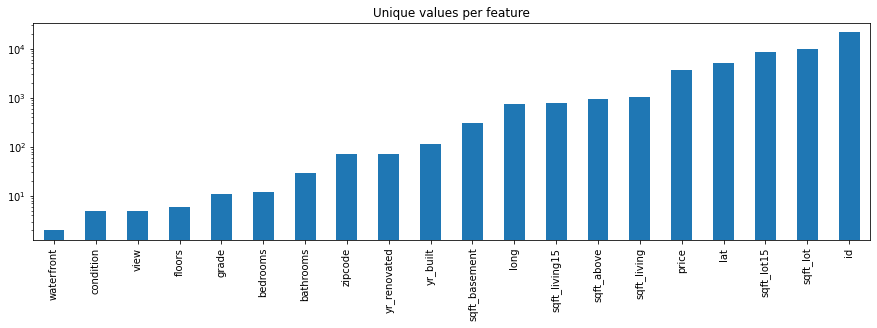

In [14]:
# get the amount of unique values per numerical feature and sort them in ascending order
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# plot the unique values to visualise the amount of unique values
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

Before we conclude this section, we are using the .describe method to look into the basic descriptive statistics and get some insights about min, max, median, mean, percentiles, standard deviation and count.

In [15]:
df.select_dtypes(include="number").describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### 1.4 Conclusion of structural investigation

With this basic structural investigation we have a slightly better understanding of our data frame and already "corrected" some of the data types. We got a rough estimation about the values (unique features) our data frame represents as well as with how many observations and which time frame we are dealing.

df.describe(), df.info() are helpful methods to get a insight directly in the beginning, but looking at the different data types seperately helps to understand to deal with the data set later on.

### 2. Quality Investigation

In this part of the notebook we are investigating the overall quality of our data. This mean we are looking for duplicates, missing values and unwanted entries or recording errors. This might also concern outliers which could have a negative impact when using the data later on for predictive modelling.

#### 2.1 Duplicates

Here we look for entries which represent the same sample point in our data set. This might come into place, by accidentially adding an observation multiple times, while extracting the data from a SQL database or so on. While looking for duplicates we need to make sure that we ignore potential indexes (which might be unique even thought the rest of the observation is a duplicate)

In [16]:
# Check number of duplicates while ignoring the index feature
num_duplicates = df.drop(labels=["id"], axis=1).duplicated().sum()
print(f"There seems to be {num_duplicates} duplicates in your database.")

There seems to be 0 duplicates in your database.


While we seem not to have any full duplicates within our data set, but iif we had duplicates, we simply could use the .drop_duplicates() method based on the relevant columns to drop duplicates from our dataset. 

As we do not have them, this step is not necessary, but we still look to see if some of the ids appear more than once.

In [17]:
id_counts = df['id'].value_counts()
id_counts.value_counts()

1    21244
2      175
3        1
Name: id, dtype: int64

We seem to have 175 ids which appear twice and one id that even appears three times within our dataset. While they are not full duplicates, it might still be worth investigating. As we only have one year worth of data, the appearance of the identical ids mights still be a mistake.

In [18]:
# create a boolean matrix that checks for 
duplicate_mask = id_counts >= 2

In [19]:
# use the mask to extract the id index where we have more than 1 entries
duplicate_ids = id_counts.index[duplicate_mask]
duplicate_ids = duplicate_ids.values.tolist()

# look at the ids which are contained in multiple observations
df[df['id'].isin(duplicate_ids)].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,2014-06-27,260000.0,2,1.00,700,4800,1.0,0.0,0.0,...,7,700,0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2015-02-10,615000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,700,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,2014-07-16,350000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,0,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,2014-07-17,360000.0,4,2.50,2080,4080,1.0,0.0,0.0,...,7,1040,1040,1962,0.0,98144,47.5720,-122.290,1340,4080


It seems that the entries are not duplicates, but that these rather indicate houses which have been resold within a short amount of time. However, while they are not duplicate the older entry is not that interesting for us and does not represent the latest information on the property we have. Therefore, the older entry will be dropped from our data set to make sure that we only keep the most relevant information.

In [20]:
# sort the data frame based on id and date
df.sort_values(['id', 'date'], inplace=True)

# drop the first entry
df = df.drop_duplicates(subset='id', keep='last')

# double check if all duplicate ids are now removed
id_counts = df['id'].value_counts()
id_counts.value_counts()

1    21420
Name: id, dtype: int64

With this we have checked for duplicates and made sure that we drop out dated data from our data set. In the next step we look into missing values and how to treat them in the context of this data set.

#### 2.2 Missing values

Missing values can be challenging, especially if we want to create a predictive model out of our data set. Thus, while it is normal to have some missing values, we need to identify how many observations have missing values and we have specific gaps in our data and how to treat them.

##### 2.2.1 Missing values per observation

First, we visualise missing values on sample level. This can be done by visualising the .isna() result.

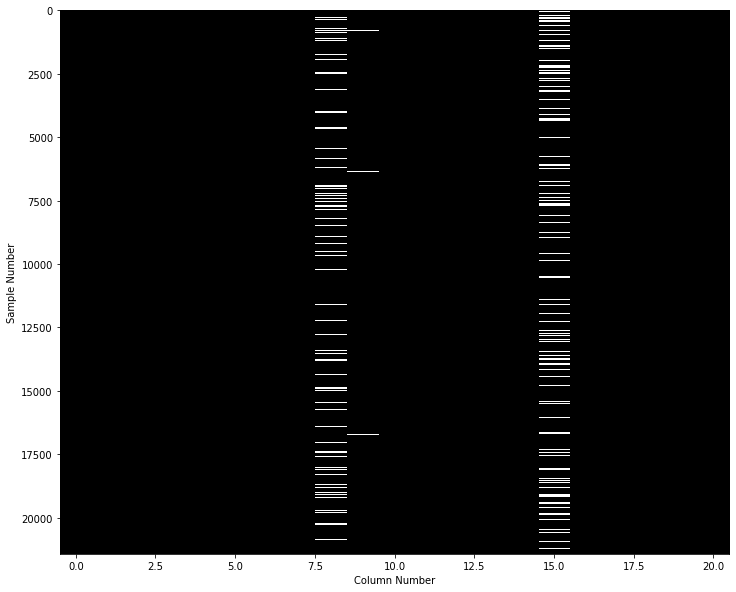

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

This graph show the observations on the y-axis and the columns on the x-axis. With this visualisation we can easily identifiy that only two columns contain a higher extent of missing values. Besides that only one additional feature seems to hold a handful of missing values. The rest of the data seems to be complete.

However, this plot (or any method looking for null / None values) is not able to identify content that indicates missing values, but is not treated by the system as such (e.g. value not given, missing value). This was for example the case with the question marks in the sqft_basement feature. While the data was missing and not given, the question mark is not a NaN value that can be recognized by the built-in methods.

As our data is quiet consistent we will see if we can finde logical ways to impede the missing values. If we had big gaps and some observations with many missing values, we could also drop some observations all together using the .dropna() method. By defining a threshold withhin the method (thresh), we can define that if a certain amount of values are missing for a observation to drop it.

```py
# example code for how to drop observations that contain more than 20% missing values
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
```

2.2.2. Missing values per feature

Next, we look at the number of missing values per feature. We can use pandas to find out what the ratio of missing values is per feature and visualise it.


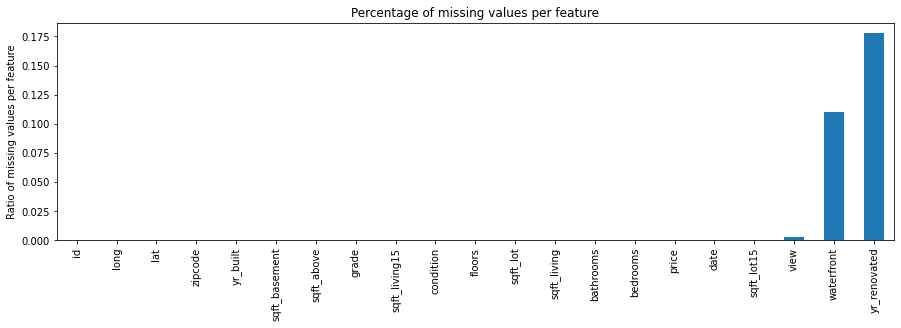

In [22]:
# create a boolean mask for the whole data frame, calculate the mean of missing vaues per feature,
# sort the values in ascending order and plot it
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

We can see that most of our features are complete and do not contain any missing values. TAs these features are also relevant for our prediction and stakeholder request, we are not going to drop these features altogher, but impude the missing values in the next step.

However, if we wanted to drop some features altogether because they consist to a very high amount out of missing values, we could do this using the following lines of code:

```py
# example code for how to drop features that contain more than 15% missing values
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
```

##### 2.2.3 Impude missing values

Before we can impude the data, we need to have a short look at the values in the respective feature columns and their meaning.

In [23]:
df[['view', 'waterfront', 'yr_renovated']].describe()

,view,waterfront,yr_renovated
count,21357.000000,19067.000000,17607.000000
mean,0.234677,0.007657,83.890101
std,0.766459,0.087172,400.534473
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4.000000,1.000000,2015.000000


Based on this overview, we can replace the NaN values in the waterfront feature with the mode of this column. This means that we are replacing the NaNs with a 0, indicating that this house is not placed at the waterfront. As this is a relevant feature for our stakeholder, we rather treat missing data in this column as "not at the waterfront" than recommending a wrong house.

In regards to the yr_renovated feature: as we are interested in the effect of the house age in regards to the housing price, the yr_renovated column might give interesting insights in this topic and we will not remove it. However, we also have many 0 values in there, which likely represent a non-renovated status and for this EDA we will interpret missing data in this column also as not renovated and replace it with a 0.

The same will be done for the view, which anyhow contains only minor missing values.

In [24]:
# replacing all NaNs with 0, which is the most common entry as well as the indication that this feature is not fullfilled.
df['view'] = df['view'].fillna(df['view'].mode()[0])
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].mode()[0])

# double check missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

2.3. Unwanted entries and recording errors

Unwanted entries or recording errors can be another challenging part within a data set and It is important to identify these observations and to differentiate them from outliers. While both can cause challenges, outliers are "true" observations, while recording errors are simple that... errors.

2.3.1. Numerical features

For numerical values, we can again use pandas .plot() function. With the following parameters are we able to set up the plot accordingly.

```lw=0```: linewidth = 0, means no lines  
```marker="."```: change the marker from a line to a '.'  
```subplots=True```: each feature is plotted in a separate subplot  
```layout=(-1, 4)```: defines the rows and columns for the plot. -1 means “as many as needed”  
```figsize=(15, 30), markersize=1```:  have a figure height of roughly the number of features and adjust the markersize accordingly


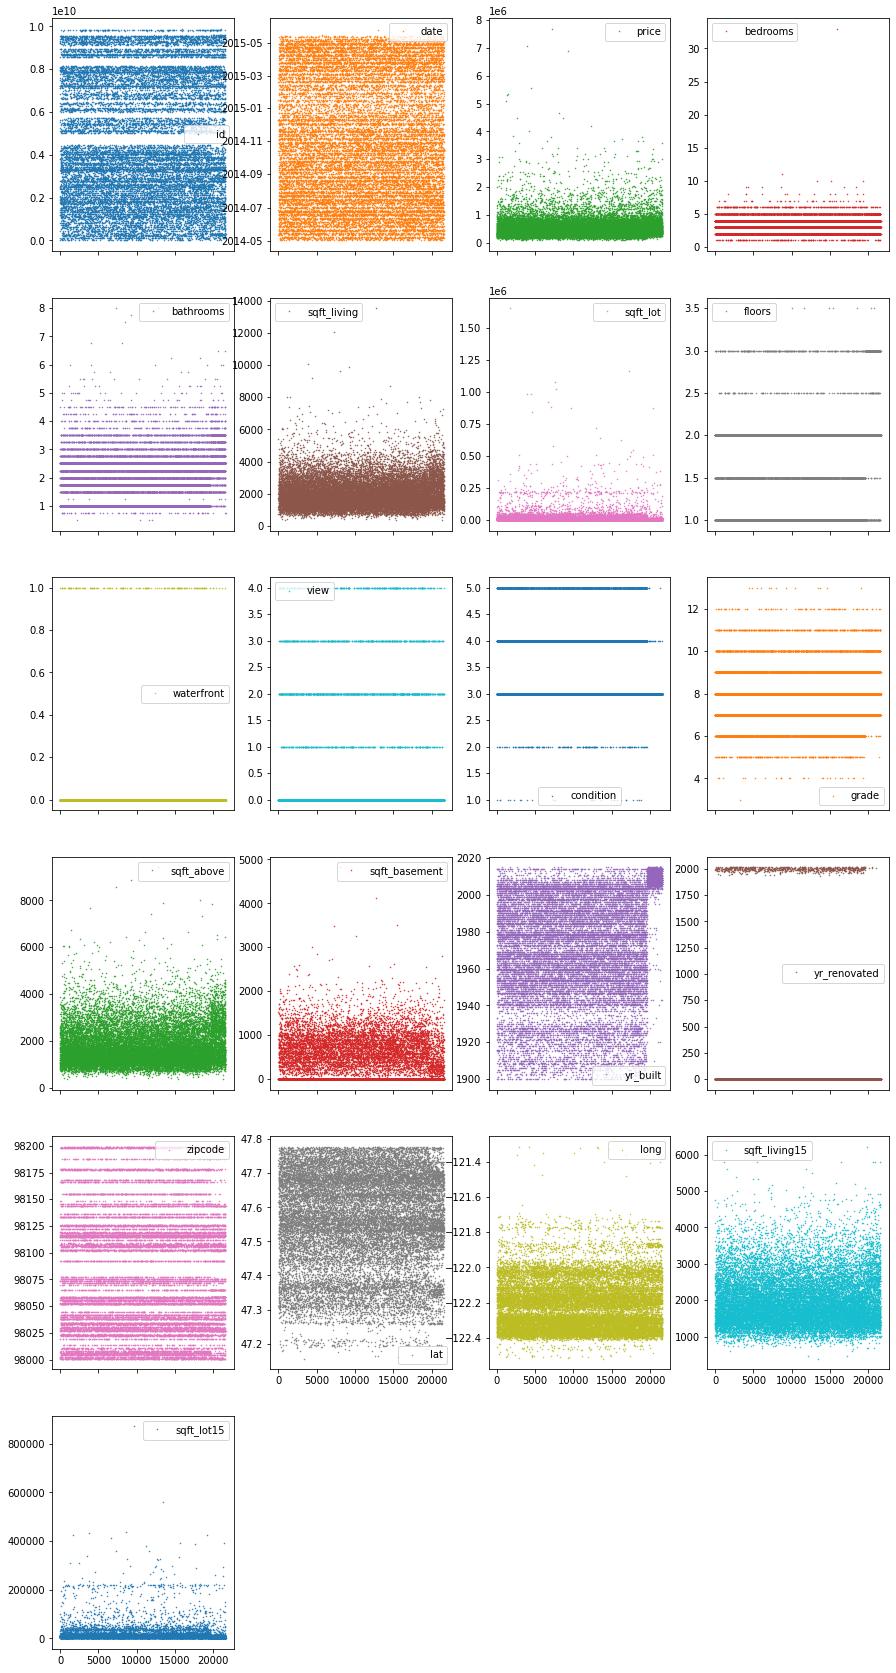

In [25]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 30), markersize=1);


Each point in this plot is a sample in our dataset and each subplot represents a different feature. While the y-axis shows the feature value, the x-axis is the sample index. 

These type of plot can quickly give some insights and ideas for data cleaning and EDA. However, the plot alone might not be sufficient and additional tools might help to make the best decisions. 
We can also see that there are quiet some outlier or potential recording errors in almost every feature available. 

One specific data point stands somewhat out. There seems to be a property with a very high amount of bedrooms. Let us have a look at this data entry.

In [26]:
# display the data observation with the highest amount of rooms
df.sort_values('bedrooms', ascending=False).head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


The property with id 15856 seems to hold 33 bedroomsm, but only 1.75 bathrooms and this on a sqft_above value of 1040. This is quiet a bit under the average sqft_above value of our entire data set and based on that it seems very likely that this is a recording error and it should rather be 3 bedrooms instead of 33. 

Thus, we correct this entry in the next step.

In [27]:
# replace the 33 within the bedrooms feature with 3
df['bedrooms'] = df['bedrooms'].replace({33:3})

While there are still some extreme values within the price, sqft_living and bathrooms, these values do not seem to be recording errors, but outliers. 

The outliers will not be removed in this step, but for predictive modelling it might be necessary to process them, so that our algorithm can handle outliers and extreme values more accurately.

The  way of investigating recording errors above however is only suitable for numerical values. Non-numerical values cannot be visualised with this plot.
One way to approach recording errors for non-numerical values, would be to start with the .describe() method, to get some insights into unique values, top values.

Next, we could loop through the non-numerical features and plot for each of them the number of occurances per unique value. The code for this could look something like that:

```py
# look at descriptive properties of non-numerical columns
df_X.describe(exclude=["number", "datetime"])

# Create figure object with required number of subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();
```

This would let us identify how often values appear for a certain feature and how many entries per feature are single occurances or dominate the feature space. If we have many quiet unique values, which only appear a handful of times, we need to decide how to treat them. 

A potential approach is to group them together and cluster them into the same group to differntiate them from the more common values. This could either be done with a .replace() statement or potentially by creating a new feature bin column.


#### 2.4 Conclusion of Quality analysis

The goal would be to get a better understanding about the overall quality of our dataset and while we have dpne this, handled missing values, removed duplicate entries and identified some recording errors, we still have not handled outliers. This would also be done within this step and might be added at a later point in time. For now, we move to the Content investigation.

### 3 Content Investigation

Until now we only looked at the quality of our data set, not at the data itself so much (we looked slightly at some of the entries to understand recording errors and duplicates, but no in-depth investigation of the general content was done).

While we already have quiet a in-depth analysis of the feature content within the EDA_basic notebook, we focus on this section more on an alternative approach to handle a new data set and see that we gain some additional insight into the content, while maybe also learning a couple of new lines of code.

#### 3.1 Feature Distribution

We start by looking at the feature distribution to better understand our data and maybe to find some interesting insights for our EDA. It might also give us some ideas how we want / need to transform our data and how we can / have to clean it.

A quick way to do this are hist plots and here we use the pandas built in .hist() method.






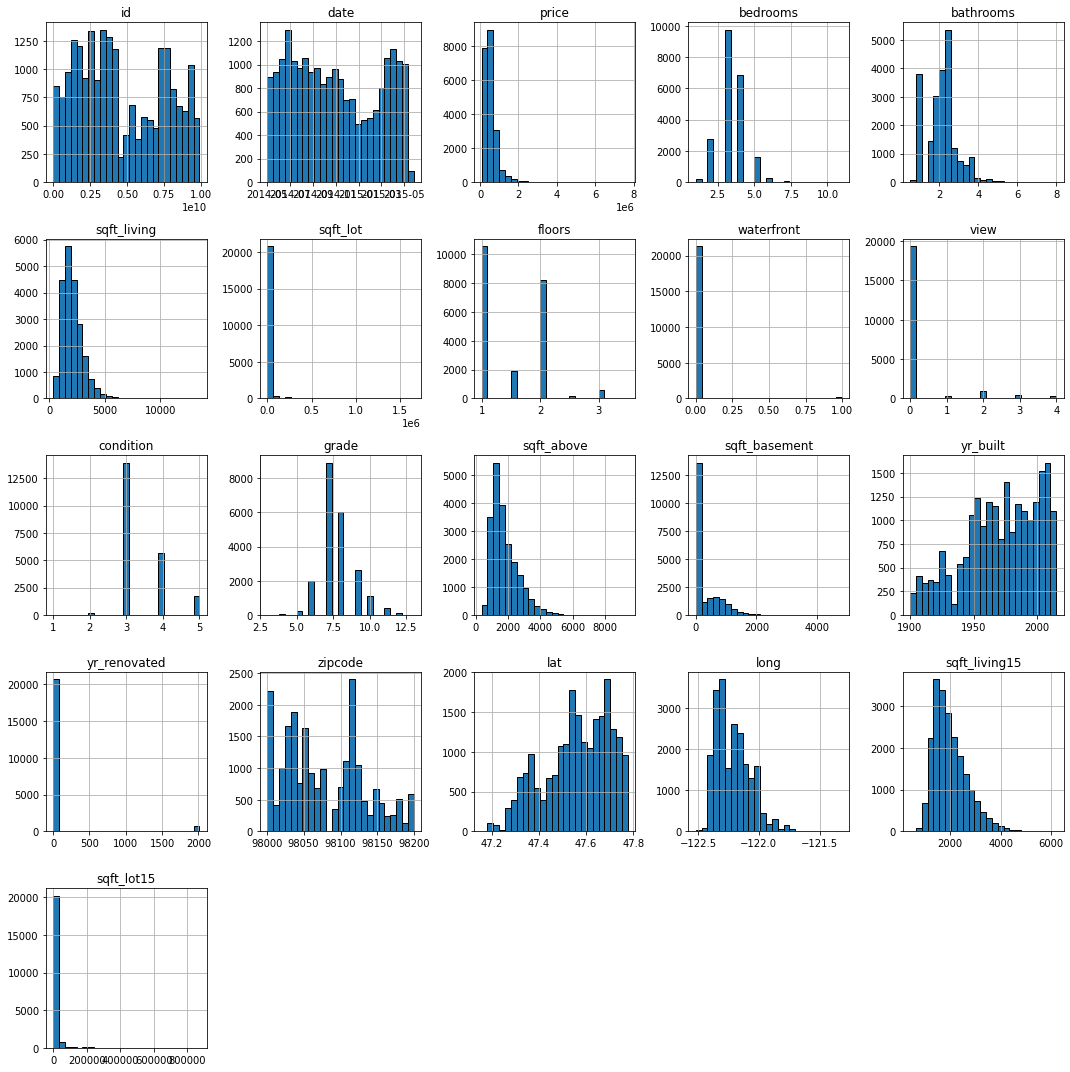

In [28]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 15), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

From this plot we can already see some interesting thhings.

- some of our features show a strong positive skewed distribution and it might be relevant to transform the data to follow more a normal distribution or gaussian distribution. For the positive (or right) skewed data a log transformation might do the trick.

- we have some numerical features that only hold a handful of unique values, e.g. waterfront, view, grade and by some level also bathrooms and bedrooms. While we already had this information in the quality investigation, this was also now clearly visible. One way to look at these features would be to look at the .mode() method. (as the other descriptive statistics might not be that insightful)

waterfront       0.993184
yr_renovated     0.965453
view             0.901774
condition        0.648926
sqft_basement    0.614753
dtype: float64

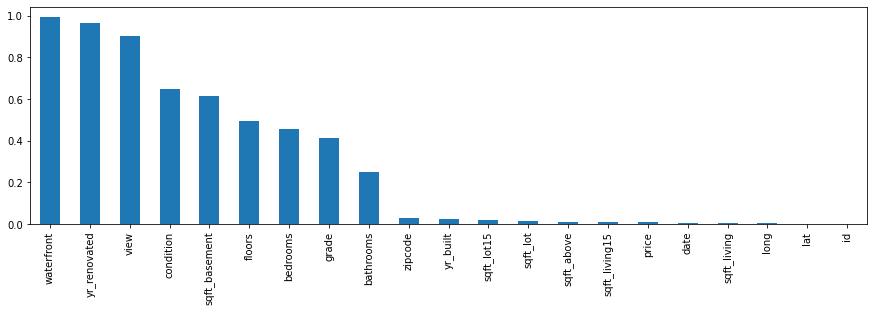

In [29]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.mode().head(1)
most_frequent_entry

# Checks for each entry if it contains the most frequent entry
df_freq = df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

With this we have extract and visualised the ratio of the frequest value per feature column.

#### 3.2. Feature patterns

Next we investigate feature specific patterns and we aim to get insight into:

1. Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
2. Can we identify particular relationships between features that will help us to better understand our dataset?

Before we can approach this questions, it is helpful to classify them as either continous or as descrete as this might have a impact on how we treat / investigate them. 

How exactely the features are divided into continous and descrete might depend on the data set / the individual features. For now we just take everything we fewer than 25 unique values as discrete, everything else as continous.

In [41]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() > 30

#### 3.2.1 Continous features

An easy way to illustrate the relationship between continous features is seaborns pair plot. While it may take a while for data sets with lot of features, this pairplot covers also a lot of information. (Still, you might not want to use it fore more than 10 features at a time|)

In [42]:
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(21420, 13)

In [43]:
df_continuous.nunique()

id               21420
price             3595
sqft_living       1034
sqft_lot          9776
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

As we "only" have 13 continous features, we still go ahead and plot it.

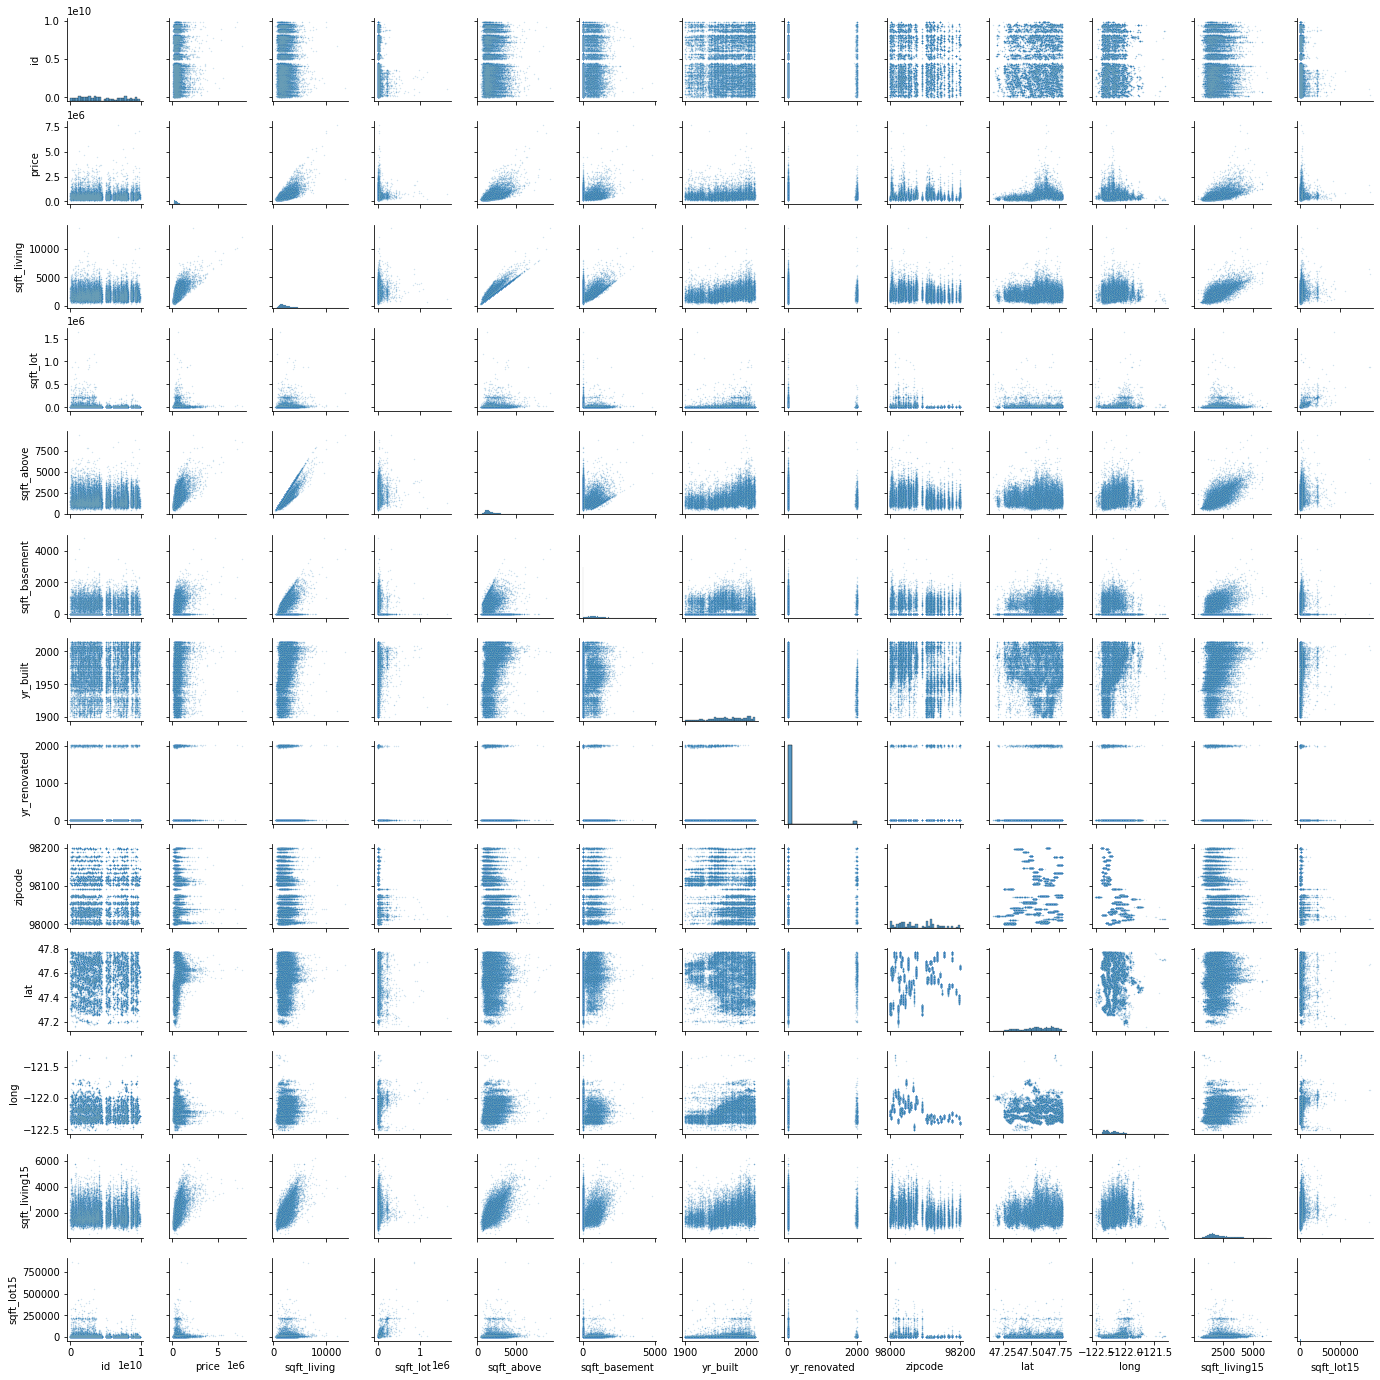

In [44]:
import seaborn as sns

# plot seaborn pairplot
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

There are definitely some features that show a clear positive correlation, especially looking at the sqft related features amongst each other, as well as price and some of the sqft features.

We also see that we have lat(itude) and long(itude) features, which might be worth investigation, as they might hold relevant insights about housing prices. For now, let us just plot them quickly and let's see if we get the expected outcome of the King County "shape". As we have the ZIP Code information also at hand, let us add this information into the plot as well.

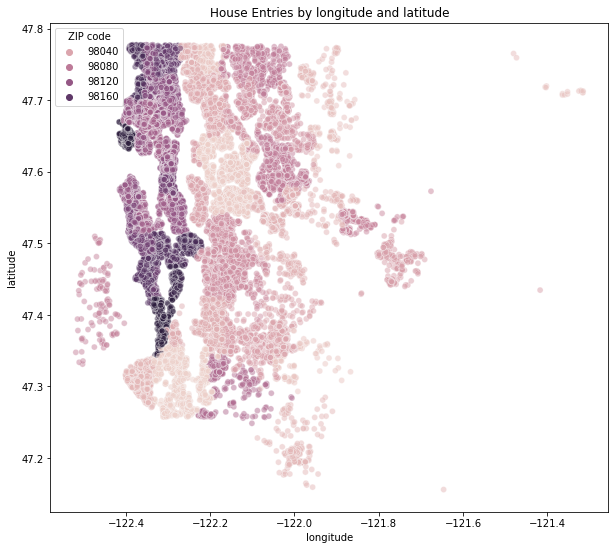

In [45]:
#print(df['zipcode'].unique())
plt.figure(figsize=(10, 9))
sns.scatterplot(y='lat', x='long', hue='zipcode', data=df, alpha=0.5)

plt.title('House Entries by longitude and latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(title='ZIP code');